# Cats vs Dogs Classifier
This is the easy, traditional ML task that I meantioned in the README. Kind of like a cross between two classic _Machine Learning 101_ tasks: MNIST and Cats/Dogs

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rcParams['figure.figsize'] = (3,3)

In [2]:
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


# Load and wrangle data

In [3]:
cats = np.load('../data/full%2Fnumpy_bitmap%2Fcat.npy')
dogs = np.load('../data/full%2Fnumpy_bitmap%2Fdog.npy')

To display the numpy arrays as the images they once were, they need to be reshaped back into a 28x28 grid - seeing as we're going to be doing some ML with them, we should also normalise them back to values between 0 and 1. The initially come as integers between 0 and 255, so we divide by 255 to normalise.

In [4]:
cats = cats.reshape(-1, 28, 28) / 255
dogs = dogs.reshape(-1, 28, 28) / 255

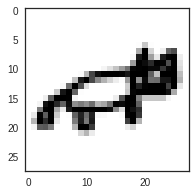

In [5]:
plt.imshow(cats[1]);

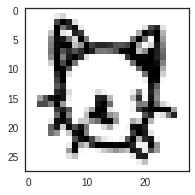

In [6]:
plt.imshow(cats[50]);

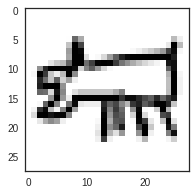

In [7]:
plt.imshow(dogs[1]);

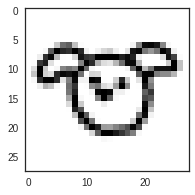

In [8]:
plt.imshow(dogs[50]);

In [9]:
print('number of cats:\t', cats.shape[0])
print('number of dogs:\t', dogs.shape[0])

number of cats:	 123202
number of dogs:	 152159


We want also want even class sizes to ensure that we're learning actual image features and not accidentally picking up on inherent biases in the dataset, so we'll shrink the number of dogs to be equal to the number of cats

In [10]:
cats = cats[:50000]
dogs = dogs[:len(cats)]

We'll concatenate all of our input data (the images) into one array and call it `X`, and create a corresponding output array called `y`, where `y` is `0` if the drawing is of a dog, or `1` if it's of a cat.

In [11]:
X = np.concatenate([cats, dogs]).reshape(-1, 28, 28, 1)

y = (np.concatenate([np.ones((len(cats),), dtype=np.int), 
                     np.zeros((len(dogs),), dtype=np.int)]))

# Build Model
The model I'm using is a variation on a classic - one well known for good preformance on MNIST, with some dropout tweaks.

In [12]:
model = Sequential([Conv2D(32, (3, 3), 
                           input_shape=(28, 28, 1)),
                    Activation('relu'),
                    MaxPool2D(pool_size=(2, 2)),
                    Dropout(0.1),
                    #
                    Conv2D(32, (3, 3)),
                    Activation('relu'),
                    MaxPool2D(pool_size=(2, 2)),
                    Dropout(0.1),
                    #
                    Conv2D(32, (3, 3)),
                    Activation('relu'),
                    MaxPool2D(pool_size=(2, 2)),
                    Dropout(0.1),
                    #
                    Flatten(),
                    Dense(64),
                    Activation('relu'),
                    Dense(1),
                    Activation('sigmoid')
                    ])

We'll compile with the ADAM optimiser. Loss is obviously binary cross-entropy because we're dealing with two classes. Metrics set to accuracy because it's simple

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train Model
the `.fit()` call passes our `X` and `y` data into the model we defined above, split so that we can train on 80% of the data and validate the model's accuracy on the remaining 20%. 5 epochs isn't a huge amount of time to wait for the model to train, but it's a deep, smart model with a lot of data so we should get to a reasonable stopping point by then.

In [14]:
model.fit(X, y, 
          batch_size=32,
          validation_split=0.2,
          epochs=5)

Train on 80000 samples, validate on 20000 samples
Epoch 1/5
80000/80000 [==============================] - 138s - loss: 0.3682 - acc: 0.8277 - val_loss: 0.4633 - val_acc: 0.7850
Epoch 2/5
80000/80000 [==============================] - 134s - loss: 0.3033 - acc: 0.8656 - val_loss: 0.4836 - val_acc: 0.7952
Epoch 3/5
80000/80000 [==============================] - 138s - loss: 0.2842 - acc: 0.8740 - val_loss: 0.4754 - val_acc: 0.7824
Epoch 4/5
80000/80000 [==============================] - 136s - loss: 0.2732 - acc: 0.8797 - val_loss: 0.3689 - val_acc: 0.8524
Epoch 5/5
80000/80000 [==============================] - 140s - loss: 0.2662 - acc: 0.8822 - val_loss: 0.3605 - val_acc: 0.8621


Final validation accuracy of 86%! Pretty good when you consider how wonky the training data is, and the fact that we've done none of the normal preprocessing! I'd be surprised if human accuracy was significantly higher. 